<a href="https://colab.research.google.com/github/bharath967/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [4]:
# Mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path='/content/drive/MyDrive/Almabetter/Credit Card Default prediction/default of credit card clients.csv'

In [6]:
# Reading our Dataset
data = pd.read_csv(path, header=1)

In [7]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [9]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
data.shape

(30000, 25)

In [11]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [13]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
data2=data.copy()

In [16]:
data.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR','BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR','PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}, inplace = True)

In [17]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
data.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_SEPT,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_AUG,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_JUL,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_JUN,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


Text(0.5, 1.0, 'Correlation between different variables')

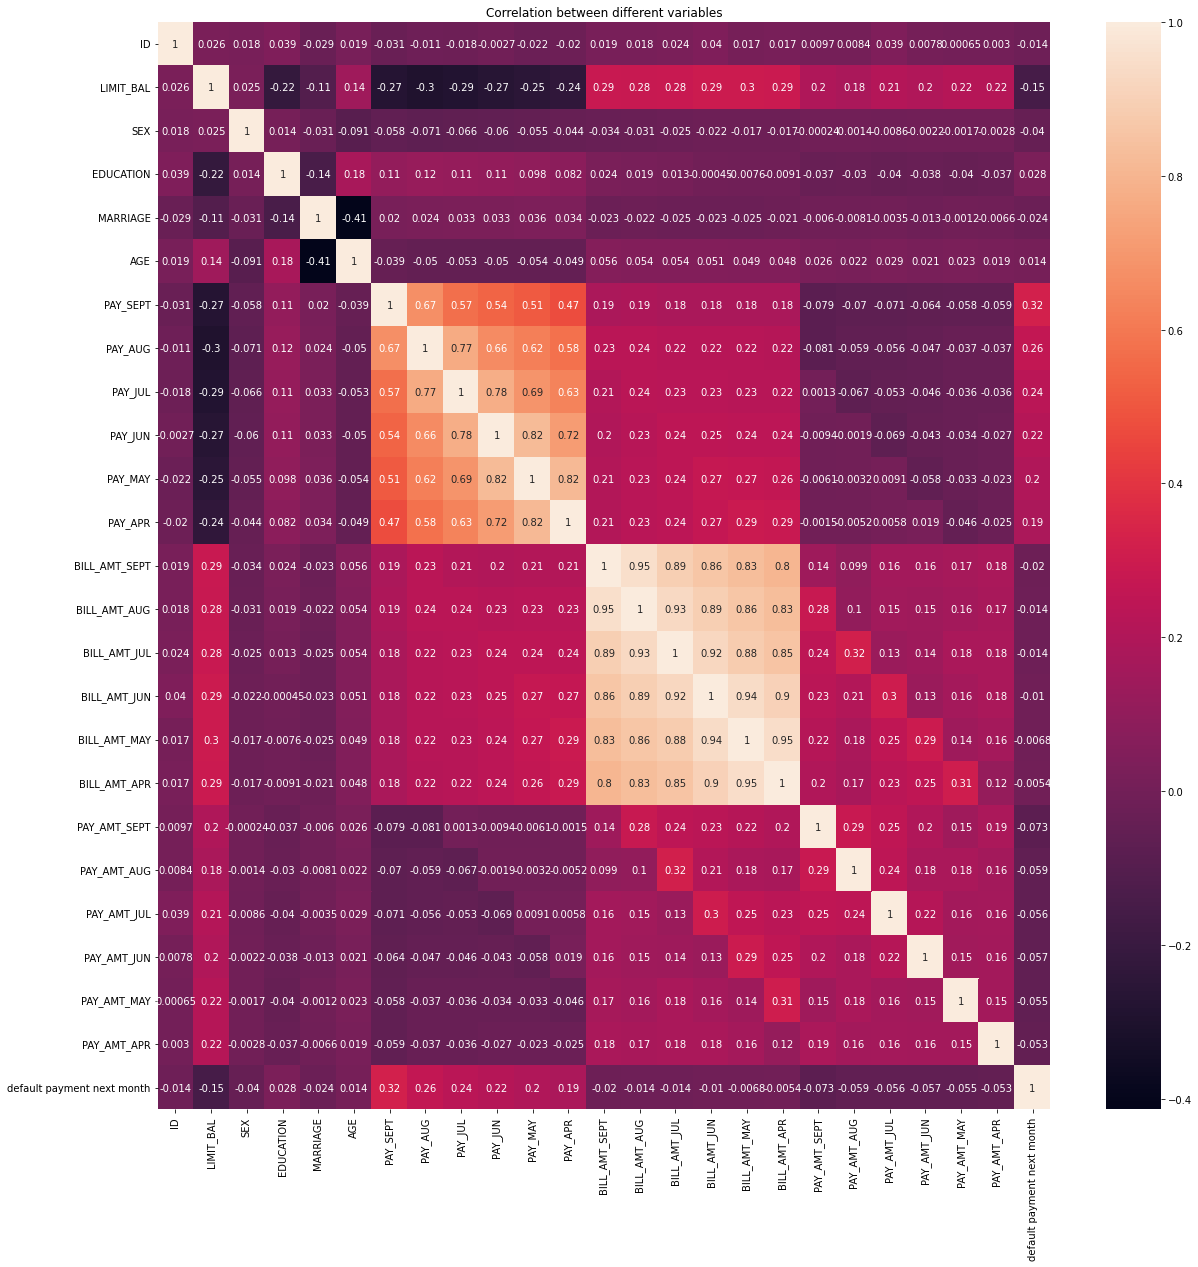

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation between different variables')

In [20]:
#Checking value counts of SEX
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

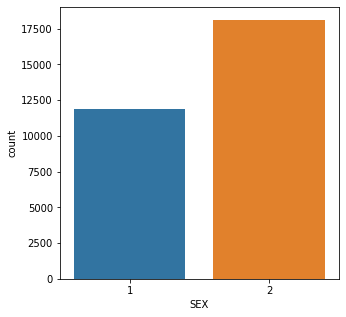

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'SEX', data = data)
plt.show()

In [22]:
#Checking value counts of IsDefaulter
data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [23]:
def sex(x):
    if (x==1):
        return "Male"
    else:
        return "Female"
data['SEX']=data['SEX'].apply(sex)

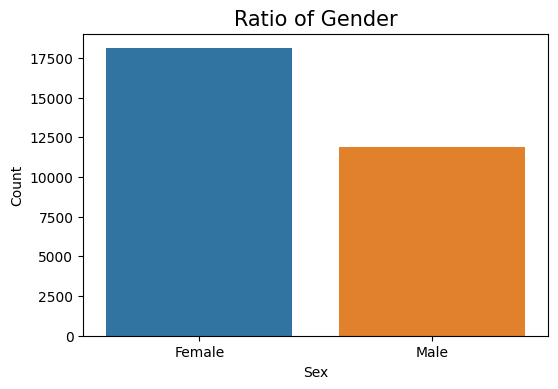

In [24]:
plt.figure(dpi=100)
data['SEX'].value_counts()
sns.countplot(x="SEX", data=data)
plt.title("Ratio of Gender", size=15)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

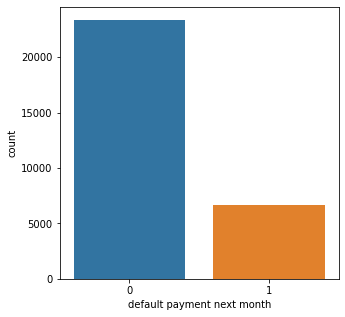

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'default payment next month', data = data)
plt.show()

In [26]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [27]:
# plotting graph for various qualification present in the dataset
def education(x):
    if (x==1):
        return "Graduate school"
    elif (x==2):
        return "University"
    elif (x==3):
        return "High School"
    else:
        return "Others"
data['EDUCATION']=data['EDUCATION'].apply(education)


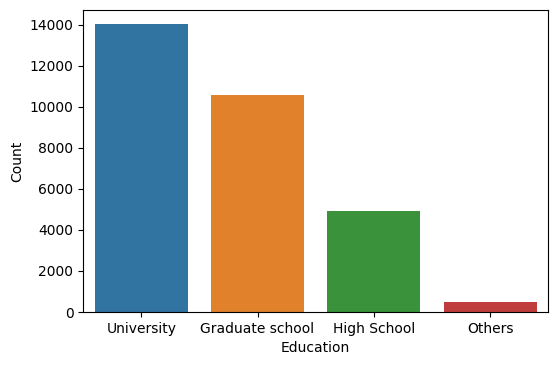

In [28]:
plt.figure(dpi=100)
data['EDUCATION'].value_counts()
sns.countplot(x="EDUCATION", data=data)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Education Defaulters')

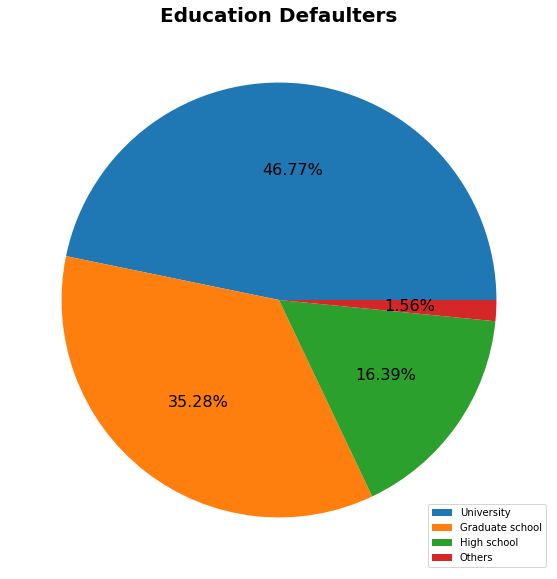

In [40]:
plt.figure(figsize=(10,10))
plt.pie(data['EDUCATION'].value_counts(),shadow = False ,autopct = '%1.2f%%',textprops = {"fontsize":16})
plt.legend(labels = ['University','Graduate school','High school','Others' ])
plt.title("Education Defaulters", fontweight='bold', fontsize=20)

In [41]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month'],
      dtype='object')

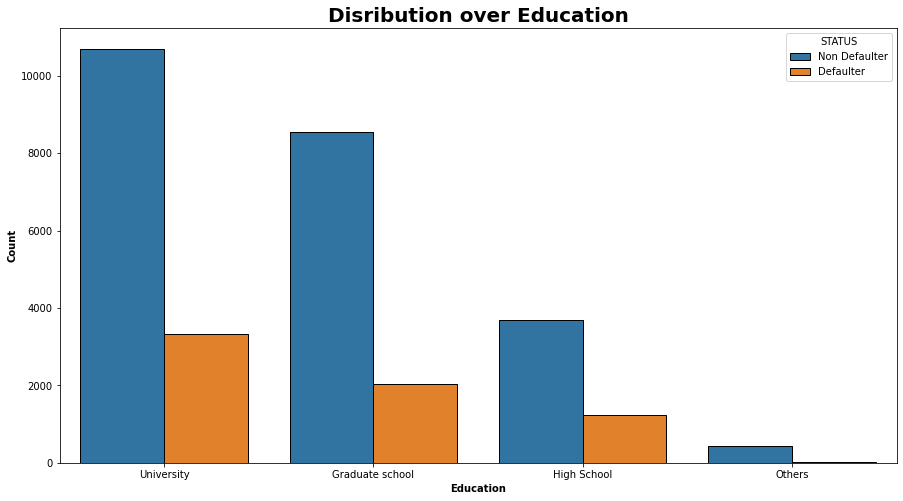

In [42]:
#distribution Educated defaulter
plt.figure(figsize=(15,8))

sns.countplot(x=data['EDUCATION'], hue='default payment next month', data=data, edgecolor = 'k')
plt.xlabel('Education',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Disribution over Education', fontweight='bold',fontsize=20)
plt.legend(title='STATUS', loc='upper right', labels=['Non Defaulter', 'Defaulter'], fontsize=10)

In [29]:
# plotting graph to findout marriage status of records
def marriage(x):
    if (x==1):
        return "Married"
    elif (x==2):
        return "Single"
    else:
        return "Others"
data['MARRIAGE']=data['MARRIAGE'].apply(marriage)

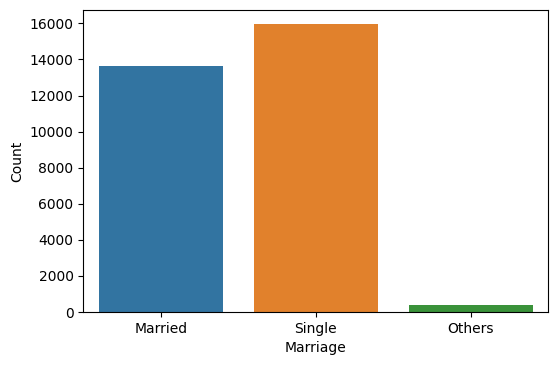

In [30]:
plt.figure(dpi=100)
data['MARRIAGE'].value_counts()
sns.countplot(x="MARRIAGE",  data=data)
plt.xlabel("Marriage")
plt.ylabel("Count")
plt.show()

In [31]:
#age wise values of credit card holder
data['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

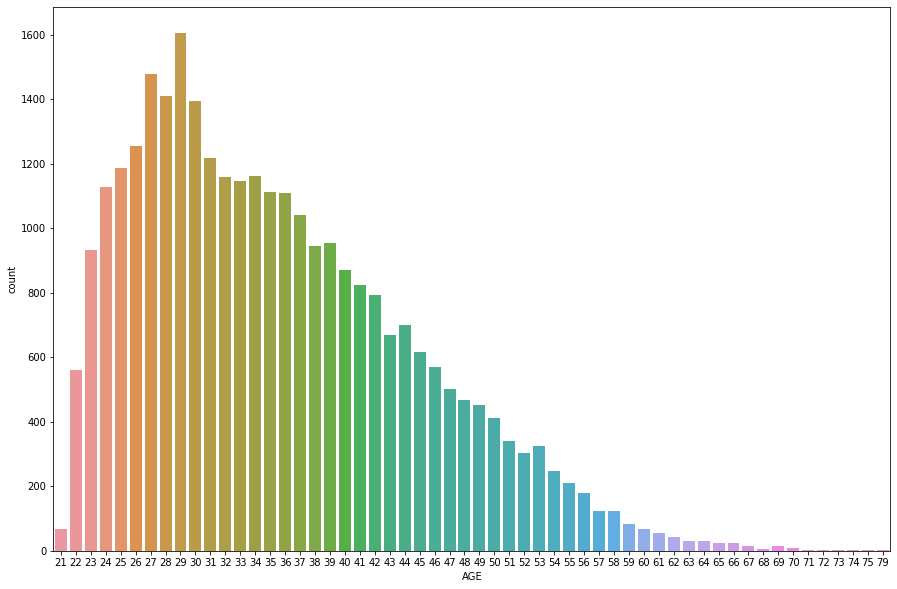

In [32]:
# plotting values count for AGE 
plt.figure(figsize=(15,10))
sns.countplot(x = 'AGE', data = data)

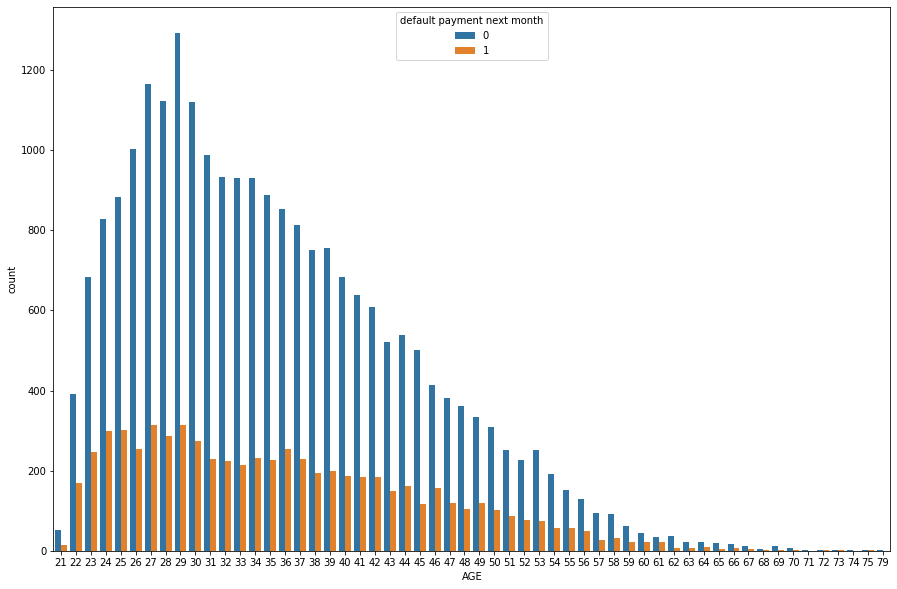

In [33]:
#plotting values count for Age with respect to IsDefaulter
plt.figure(figsize=(15,10))
sns.countplot(x = 'AGE', hue = 'default payment next month', data = data)

In [34]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month'],
      dtype='object')

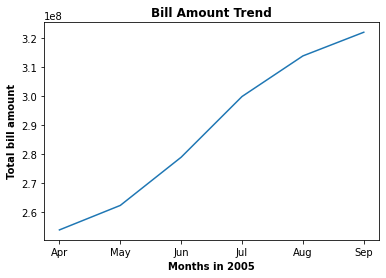

In [35]:
# we will check billing amount trend for those people who has atleast one latepayment
bill_trend = data[data['default payment next month']== 1]
bill_amt_trend = bill_trend[['BILL_AMT_APR','BILL_AMT_MAY','BILL_AMT_JUN','BILL_AMT_JUL','BILL_AMT_AUG','BILL_AMT_SEPT']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(bill_amt_trend)
plt.xticks(['BILL_AMT_APR','BILL_AMT_MAY','BILL_AMT_JUN','BILL_AMT_JUL','BILL_AMT_AUG','BILL_AMT_SEPT'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total bill amount',fontweight='bold')
plt.title('Bill Amount Trend',fontweight='bold')
plt.show()

In [36]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month'],
      dtype='object')

Text(0.5, 1.0, 'Repayment Status Trend')

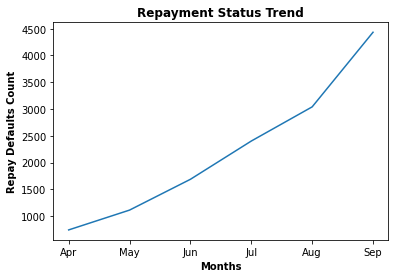

In [37]:
repay_status = data[data['default payment next month']== 1]
repay_trend = bill_trend[['PAY_APR','PAY_MAY','PAY_JUN','PAY_JUL','PAY_AUG','PAY_SEPT']].sum(axis=0)

fig,ax = plt.subplots()
ax.plot(repay_trend)
plt.xticks(['PAY_APR','PAY_MAY','PAY_JUN','PAY_JUL','PAY_AUG','PAY_SEPT'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months',fontweight='bold')
plt.ylabel('Repay Defaults Count',fontweight='bold')
plt.title('Repayment Status Trend', fontweight='bold')

Text(0.5, 1.0, 'Repayment Amount Trend')

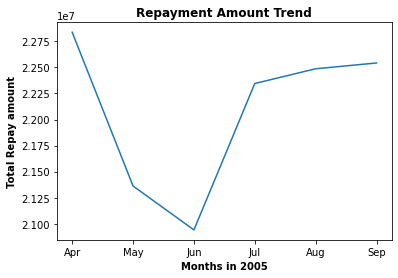

In [38]:
repay_status = data[data['default payment next month']== 1]
repay_trend = bill_trend[['PAY_AMT_APR','PAY_AMT_MAY','PAY_AMT_JUN','PAY_AMT_JUL','PAY_AMT_AUG','PAY_AMT_SEPT']].sum(axis=0)

fig,ax = plt.subplots()
ax.plot(repay_trend)
plt.xticks(['PAY_AMT_APR','PAY_AMT_MAY','PAY_AMT_JUN','PAY_AMT_JUL','PAY_AMT_AUG','PAY_AMT_SEPT'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total Repay amount',fontweight='bold')
plt.title('Repayment Amount Trend',fontweight='bold')

In [43]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month'],
      dtype='object')

In [44]:
# we will try to fetch relation between credit limit and default payment
def_n = data.loc[data['default payment next month'] == 0,'LIMIT_BAL']
def_y= data.loc[data['default payment next month'] == 1,'LIMIT_BAL']

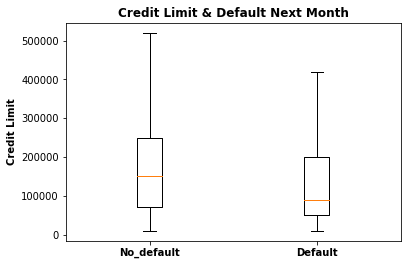

In [45]:
fig, ax = plt.subplots()
ax.boxplot([def_n, def_y],  showfliers=False)  #Using matplotlib boxplot

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit Limit',fontweight ='bold')
ax.set_title('Credit Limit & Default Next Month',fontweight ='bold')

plt.show()

In [61]:
independent_variables = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [62]:
dependent_variables = ['default payment next month']

In [63]:
# storing values in X and y of both types of variables
X = data2[independent_variables].values

y = data2[dependent_variables].values

In [64]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [65]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [66]:
classifier1 = LogisticRegression(max_iter=10000)
classifier1.fit( X_train, y_train.ravel() )
y_pred_lr = classifier1.predict( X_test )

In [67]:
cm = confusion_matrix( y_test, y_pred_lr )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for LogReg = 0.78


In [70]:
# importing svm
from sklearn.svm import SVC

In [69]:
classifier2 = SVC(kernel="rbf")
classifier2.fit( X_train, y_train.ravel() )
y_pred_svm = classifier2.predict( X_test )

In [71]:
cm = confusion_matrix( y_test, y_pred_svm )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for kernel-SVM = 0.78


In [72]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [75]:
# fitting algorithm
classifier3= RandomForestClassifier(n_estimators=10)
classifier3.fit( X_train, y_train.ravel() )
y_pred_rfc = classifier3.predict( X_test )

In [76]:
cm = confusion_matrix( y_test, y_pred_rfc )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for RandomForest = 0.80


In [77]:
# importing knn
from sklearn.neighbors import KNeighborsClassifier

In [78]:
# fitting data into algo
classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit( X_train, y_train.ravel() )
y_pred_knn = classifier4.predict( X_test )

In [79]:
cm = confusion_matrix( y_test, y_pred_knn )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for KNeighborsClassifier = 0.75


In [80]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [81]:
# calling algorithm
classifier5 = DecisionTreeClassifier(max_depth=10, random_state=14) 

In [82]:
# training the classifier
classifier5.fit(X_train, y_train.ravel())
# do our predictions on the test
predictions = classifier5.predict(X_test)

In [83]:
# see how good we did on the test
cm = confusion_matrix( y_test, predictions )
print("Accuracy on Test Set for Decesion Tree Classifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for Decesion Tree Classifier = 0.80


In [85]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_rfc, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_svm, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_lr, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_pred_knn, pos_label=1)

In [86]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

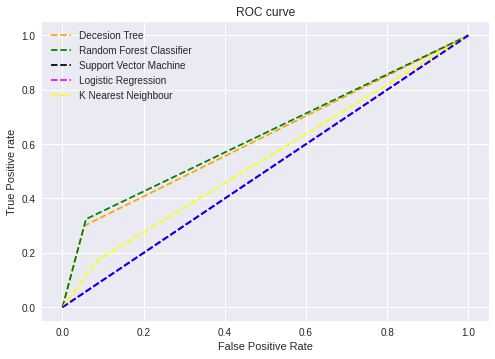

In [88]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decesion Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='Support Vector Machine')
plt.plot(fpr4, tpr4, linestyle='--',color='magenta', label='Logistic Regression')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='K Nearest Neighbour')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**Decsion Tree Classifier Tuning Hyperparameters**

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [92]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=5)
clf_tree.fit(X_train, y_train.ravel())
clf_tree_pred=clf_tree.predict(X_test)


In [93]:
cm = confusion_matrix( y_test, clf_tree_pred )
print("Accuracy on Test Set for Decesion Tree Classifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for Decesion Tree Classifier = 0.81
